## Multiple Layer GRU

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [3]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 55s 127ms/step - loss: 0.4564 - accuracy: 0.7780 - val_loss: 0.3098 - val_accuracy: 0.8783
Epoch 2/10
391/391 [==============================] - 25s 63ms/step - loss: 0.2256 - accuracy: 0.9159 - val_loss: 0.3018 - val_accuracy: 0.8782
Epoch 3/10
391/391 [==============================] - 22s 55ms/step - loss: 0.1717 - accuracy: 0.9373 - val_loss: 0.3397 - val_accuracy: 0.8714
Epoch 4/10
391/391 [==============================] - 21s 53ms/step - loss: 0.1392 - accuracy: 0.9498 - val_loss: 0.3769 - val_accuracy: 0.8650
Epoch 5/10
391/391 [==============================] - 21s 52ms/step - loss: 0.1118 - accuracy: 0.9618 - val_loss: 0.4850 - val_accuracy: 0.8594
Epoch 6/10
391/391 [==============================] - 22s 55ms/step - loss: 0.0898 - accuracy: 0.9689 - val_loss: 0.4791 - val_accuracy: 0.8622
Epoch 7/10
391/391 [==============================] - 20s 50ms/step - loss: 0.0712 - accuracy: 0.9762 - val_loss: 0.6001 - val_accuracy

In [10]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

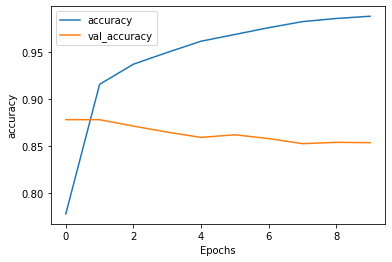

In [11]:
plot_graphs(history, 'accuracy')

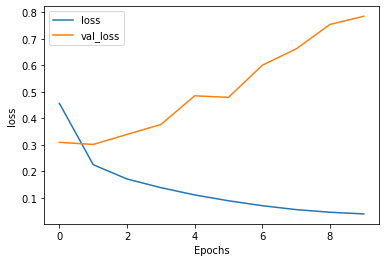

In [12]:
plot_graphs(history, 'loss')

## 2nd Week Note

In [13]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

In [15]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# str(s.tonumpy()) is needed in Python3 instead of just s.numpy()
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
  
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [16]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [17]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? b'i have been known to fall asleep during films but this is usually due to a combination of things including really tired being warm and comfortable on the <OOV> and having just eaten a lot however on this occasion i fell asleep because the film was rubbish the plot development was constant constantly slow and boring things seemed to happen but with no explanation of what was causing them or why i admit i may have missed part of the film but i watched the majority of it and everything just seemed to happen of its own <OOV> without any real concern for anything else i cant recommend this film at all '
b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was constant. Constantly slow and boring. Things seemed to happen, but with no explanation of 

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9600      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [19]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
782/782 [==============================] - 17s 17ms/step - loss: 0.5242 - accuracy: 0.7204 - val_loss: 0.3734 - val_accuracy: 0.8394
Epoch 2/50
782/782 [==============================] - 13s 16ms/step - loss: 0.3127 - accuracy: 0.8712 - val_loss: 0.3511 - val_accuracy: 0.8480
Epoch 3/50
782/782 [==============================] - 13s 17ms/step - loss: 0.2435 - accuracy: 0.9071 - val_loss: 0.3905 - val_accuracy: 0.8299
Epoch 4/50
782/782 [==============================] - 13s 16ms/step - loss: 0.1870 - accuracy: 0.9313 - val_loss: 0.4171 - val_accuracy: 0.8346
Epoch 5/50
782/782 [==============================] - 13s 17ms/step - loss: 0.1344 - accuracy: 0.9533 - val_loss: 0.5042 - val_accuracy: 0.8247
Epoch 6/50
782/782 [==============================] - 13s 17ms/step - loss: 0.0908 - accuracy: 0.9700 - val_loss: 0.5640 - val_accuracy: 0.8239
Epoch 7/50
782/782 [==============================] - 13s 17ms/step - loss: 0.0646 - accuracy: 0.9795 - val_loss: 0.6710 - val_accuracy:

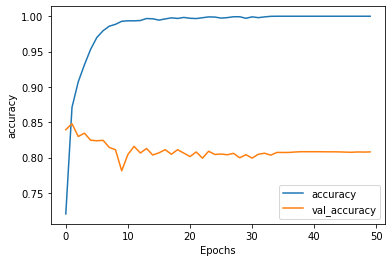

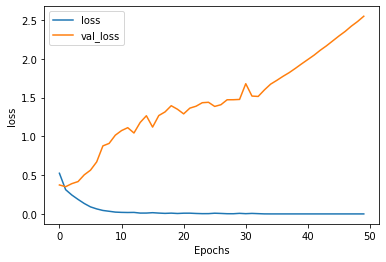

In [20]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [21]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
782/782 [==============================] - 7s 8ms/step - loss: 0.4529 - accuracy: 0.7836 - val_loss: 0.3467 - val_accuracy: 0.8500
Epoch 2/50
782/782 [==============================] - 6s 8ms/step - loss: 0.2805 - accuracy: 0.8852 - val_loss: 0.3581 - val_accuracy: 0.8446
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 0.2302 - accuracy: 0.9078 - val_loss: 0.3911 - val_accuracy: 0.8368
Epoch 4/50
782/782 [==============================] - 6s 7ms/step - loss: 0.1933 - accuracy: 0.9266 - val_loss: 0.4127 - val_accuracy: 0.8320
Epoch 5/50
782/782 [==============================] - 6s 7ms/step - loss: 0.1605 - accuracy: 0.9400 - val_loss: 0.4706 - val_accuracy: 0.8284
Epoch 6/50
782/782 [==============================] - 5s 7ms/step - loss: 0.1340 - accuracy: 0.9537 - val_loss: 0.5242 - val_accuracy: 0.8241
Epoch 7/50
782/782 [==============================] - 6s 8ms/step - loss: 0.1119 - accuracy: 0.9614 - val_loss: 0.5785 - val_accuracy: 0.8177
Epoch 

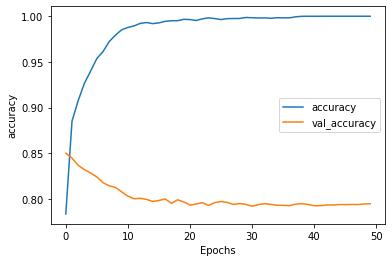

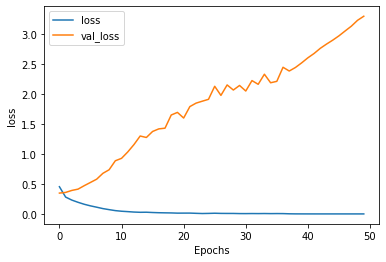

In [23]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [22]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 774       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
782/782 [==============================] - 5s 7ms/step - loss: 1.4088e-06 - accuracy: 1.0000 - val_loss: 3.3845 - val_accuracy: 0.7946
Epoch 2/50
782/782 [==============================] - 5s 7ms/step - loss: 9.6272e-07 - accuracy: 1.0000 - val_loss: 3.4725 - val_accuracy: 0.7946
Epoch 3/50
782/782 [==============================] - 5s 7ms/step - loss: 6.5214e-07 - accuracy: 1.0000 - val_loss: 3.5620 - val_accuracy: 0.7950
Epoch 4/50
782/782 [==============================] - 5s 7ms/step - loss: 4.3125e-07 - accuracy: 1.0000 - val_loss: 3.6484 - val_accuracy: 0.7949
Epoch 5/50
782/782 [==============================] - 5s 7ms/step - loss: 3.1226e-07 - accuracy: 1.0000 - val_loss: 3.7540 - val_accuracy: 0.7952
Epoch 6/50
782/782 [==============================] - 5s 7ms/step - loss: 2.0416e-07 - accuracy: 1.0000 - val_loss: 3.8290 - val_accuracy: 0.7950
Epoch 7/50
782/782 [==============================] - 5s 7ms/step - loss: 1.4041e-07 - accuracy: 1.0000 - val_loss: 3.9206 -

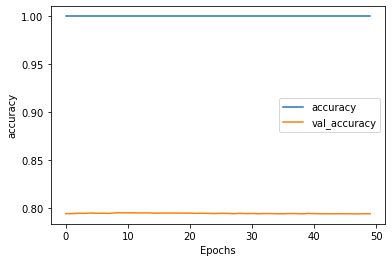

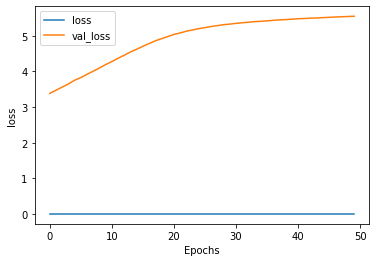

In [24]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')